In [2]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt 

df = pd.read_csv('data/311_Explorer_01.csv', parse_dates=\
                 ['Date Created','Date Closed'], \
                 low_memory = False)
df.columns

Index(['Reference Number', 'Date Created', 'Date Closed', 'Request Status',
       'Status Detail', 'Service Category', 'Service Code', 'Business Unit',
       'Neighbourhood', 'Community League', 'Ward', 'Address', 'Lat', 'Long',
       'Location', 'Ticket Source', 'Calendar Year', 'Days to Resolution',
       'Month Created', 'Month Closed'],
      dtype='object')

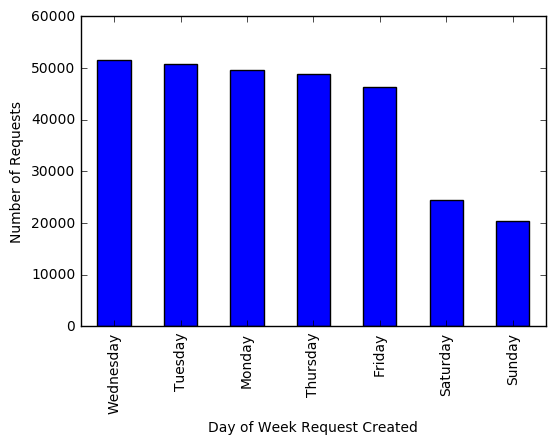

In [2]:
# get the days of the week to plot
df['Day of Week Request Created'] = df['Date Created'].dt.weekday_name
df['Day of Week Request Closed'] = df['Date Closed'].dt.weekday_name

df['Day of Week Request Created'].value_counts().plot.bar()

plt.ylabel("Number of Requests")
plt.xlabel("Day of Week Request Created")
plt.show()


In [1]:
df.to_csv('data/311_Explorer_02.csv', index=False)

NameError: name 'df' is not defined

In [4]:
df2 = pd.read_csv('data/2013-2017_Council_And_Committee_Meetings_-_Meeting_Details.csv', parse_dates=['MEETING_DATE'], low_memory = False)
df2['MEETING_TYPE'].value_counts()
# categorize into council meetings, hearings, committees

City Council                                          112
Agenda Review Committee                                89
City Council Public Hearing                            76
Executive Committee                                    75
Community Services Committee                           50
Transportation Committee                               46
Community Standards and Licence Appeal Committee       41
Urban Planning Committee                               26
Utility Committee                                      24
Community and Public Services Committee                24
Special City Council                                   22
Audit Committee                                        22
CM and CA Performance Review Committee                 20
LRT Governance Board Committee                         18
Council Services Committee                             15
Special Audit Committee                                12
Special Executive Committee                            10
Audit Selectio

In [6]:
list(df2.columns)

['MEETING_ID',
 'MEETING_TYPE',
 'RECORD_TYPE',
 'MEETING_DATE',
 'MEETING_TIME',
 'MEETING_LOCATION']

In [5]:
df2.loc[df2['MEETING_TYPE'].str.contains("Committee"),'MEETING_TYPE'] = "Committee"
df2['MEETING_TYPE'].value_counts()

Committee                      505
City Council                   112
City Council Public Hearing     76
Special City Council            22
City Council Budget              4
Name: MEETING_TYPE, dtype: int64

In [6]:
df2.loc[df2['MEETING_TYPE']=='City Council Public Hearing', 'MEETING_TYPE'] = "Hearing"
df2['MEETING_TYPE'].value_counts()

Committee               505
City Council            112
Hearing                  76
Special City Council     22
City Council Budget       4
Name: MEETING_TYPE, dtype: int64

In [7]:
df2.loc[df2['MEETING_TYPE'].str.contains("Council"),'MEETING_TYPE'] = "Council"
df2['MEETING_TYPE'].value_counts()

Committee    505
Council      138
Hearing       76
Name: MEETING_TYPE, dtype: int64

In [8]:
#remove unnecessary columns
del df2['MEETING_ID']
del df2['RECORD_TYPE']
del df2['MEETING_TIME']
del df2['MEETING_LOCATION']
df2.columns

Index(['MEETING_TYPE', 'MEETING_DATE'], dtype='object')

In [9]:
df2.to_csv('data/council_cleaned.csv', index=False)

In [3]:
df

,Reference Number,Date Created,Date Closed,Request Status,Status Detail,Service Category,Service Code,Business Unit,Neighbourhood,Community League,Ward,Address,Lat,Long,Location,Ticket Source,Calendar Year,Days to Resolution,Month Created,Month Closed
0,133345190,2013-01-02,2013-01-03,Closed,NaN,Dead Animal Removal,Dead Animal,Animal Control,ROPER INDUSTRIAL,NaN,9.0,"MCINTYRE ROAD NW, 75 STREET NW",53.494909,-113.442684,"(53.4949091725789, -113.442683685775)",Telephone call,2013,"[0, 2]",1,1.0
1,133350619,2013-01-02,2013-01-03,Closed,NaN,Dead Animal Removal,Dead Animal,Animal Control,LARKSPUR,The Meadows Community League Association,9.0,2004 - 38 AVENUE NW,53.477458,-113.372937,"(53.4774575415008, -113.372937215704)",Telephone call,2013,"[0, 2]",1,1.0
2,133358214,2013-01-02,2013-01-03,Closed,NaN,Dead Animal Removal,Dead Animal,Animal Control,GROVENOR,Grovenor Community League,9.0,"STONY PLAIN ROAD NW, 146 STREET NW",53.541951,-113.572553,"(53.5419506014602, -113.572553447766)",Telephone call,2013,"[0, 2]",1,1.0
3,133362915,2013-01-02,2013-01-03,Closed,NaN,Dead Animal Removal,Dead Animal,Animal Control,KENSINGTON,Kensington Community League,9.0,"124 STREET NW, 135 AVENUE NW",53.596425,-113.536605,"(53.5964246289633, -113.536605453992)",Telephone call,2013,"[0, 2]",1,1.0
4,133793810,2013-01-04,2013-01-05,Closed,NaN,Dead Animal Removal,Dead Animal,Animal Control,RAMPART INDUSTRIAL,Cumberland/Oxford Community League (COCL),9.0,"142 STREET NW, 145 AVENUE NW",53.607870,-113.569706,"(53.607869643367, -113.569705706795)",Telephone call,2013,"[0, 2]",1,1.0
5,133801539,2013-01-04,2013-01-05,Closed,NaN,Dead Animal Removal,Dead Animal,Animal Control,BONNIE DOON,The Cloverdale Community League,9.0,"97 STREET NW, 95 AVENUE NW",53.531987,-113.479247,"(53.5319872998896, -113.479246806762)",Telephone call,2013,"[0, 2]",1,1.0
6,8007107432,2013-02-15,2013-02-22,Closed,NaN,Pothole,Road,Roadway Operations,PARSONS INDUSTRIAL,NaN,11.0,"92 STREET NW, 26 AVENUE NW",53.455413,-113.470724,"(53.4554129808804, -113.47072368657)",Telephone call,2013,"(6, 8]",2,2.0
7,8007110682,2013-02-16,2013-02-22,Closed,NaN,Pothole,Road,Roadway Operations,SOUTHEAST INDUSTRIAL,NaN,11.0,"76 AVENUE NW, 17 STREET NW",53.512173,-113.369311,"(53.5121732324695, -113.369311381329)",Telephone call,2013,"(4, 6]",2,2.0
8,162275947,2014-10-10,2014-10-11,Closed,NaN,Dead Animal Removal,Dead Animal,Animal Control,BELVEDERE,Belvedere Community League,8.0,"65 STREET NW, FORT ROAD [SOUTHBOUND SIDE] NW",53.585944,-113.441238,"(53.5859441652213, -113.441238371358)",Telephone call,2014,"[0, 2]",10,10.0
9,8007119869,2013-02-18,2013-02-21,Closed,NaN,Pothole,Road,Roadway Operations,CORONET INDUSTRIAL,NaN,8.0,"97 STREET NW, 51 AVENUE NW",53.488148,-113.479380,"(53.4881478628254, -113.479380291521)",Telephone call,2013,"(2, 4]",2,2.0
